# Background
* To write a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator by utilizing a simple Python library 'citipy' and the 'OpenWeatherMap API' to create a representative model of weather across world cities.
    ![eart](images_notebk/imgEarth.png)

## Observable Trends:
1. Latitude and temperature have a STRONG correlation.
2. Latitude has VERY WEAK correlation with humidity, windspeed or cloud cover.
3. Seasonal changes in temperature are only a small variable in humidity fluctuation.

## Reasoning:
* Cities closer to the 30 N line of Lat are warmer. The farther away a city is from 30 N line, the cooler its weather. 
    
    * This is evident from the plots for NH and SH which show that the Latitude and Temperature have a STRONG correlation.

* Regardless of hemisphere,humidity is between 60% to 100% for majority of cities.

    * From this analysis, it is evident that seasonal changes in temperature are only a small variable in humidity fluctuation.

    * Plot also shows a VERY WEAK correlation between Lat and Humidity

* Globally, a majority of cities cloud cover is one of two extremes; 100% or 0% cloud cover. 

    * Plot also shows a VERY WEAK correlation between Lat and Cloudiness

* As per today's data, in both the Northern and Southern Hemispheres, a majority of cities have wind speeds that are not beyond 10 MPH. 

    * Plot also shows a VERY WEAK correlation between Lat and Wind Speed



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import pprint
from scipy.stats import linregress
from matplotlib import cm

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of Cities Retrived : {len(cities)}")

Number of Cities Retrived : 601


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# lists to hold reponse info
city_name = []	
lat	 = []	
lng  = []	
max_temp     = []		
humidity	 = []	
cloudiness   = []	
wind_speed	 = []	
country      = []
country_date = []	

# Loop through the list of cities and perform a request for data on each
i = 1

print("Beginning Data Retrieval")     
print("--------------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        print(f"Processing Record {i} City Numer: {response['id']} | {response['name']}")
        city_name.append(city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        country_date.append(response['dt'])
                
    except (KeyError, IndexError): # response['cod'] == '404':
        print(f"City({city}) not found. Skipping....") 
    i+=1
print("--------------------------------")
print("Data Retrieval Complete")      
print("--------------------------------")  

Beginning Data Retrieval
--------------------------------
--------------------------------
Data Retrieval Complete
--------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# city_data_df = pd.read_csv("output_data/cities.csv")
# city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index       566 non-null    int64  
 1   City        566 non-null    object 
 2   Lat         566 non-null    float64
 3   Lng         566 non-null    float64
 4   Max Temp    566 non-null    float64
 5   Humidity    566 non-null    int64  
 6   Cloudiness  566 non-null    int64  
 7   Wind Speed  566 non-null    float64
 8   Country     561 non-null    object 
 9   Date        566 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 44.3+ KB


In [5]:
# Convert Raw Data to DataFrame by zipping the lists created in for loop
city_data_df = pd.DataFrame(list(zip(city_name,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,country_date)),columns =['City','Lat','Lng', 'Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])

# Export the city data into a .csv.
city_data_df.to_csv(output_data_file,index_label="Index")

# Display the DataFrame
city_data_df

In [6]:
city_data_df.describe()

,Index,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.0000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,282.5000,20.342475,17.630215,68.580618,69.167845,54.503534,7.539576,1.624227e+09
std,163.5344,32.794181,91.121313,14.888070,21.363481,38.848959,5.066356,9.019267e+01
min,0.0000,-54.800000,-179.166700,31.800000,6.000000,0.000000,0.000000,1.624226e+09
25%,141.2500,-5.287175,-67.192550,57.967500,58.000000,14.000000,3.695000,1.624227e+09
50%,282.5000,25.242150,20.833350,70.230000,74.500000,62.000000,6.220000,1.624227e+09
75%,423.7500,46.841325,100.844025,78.997500,85.000000,94.000000,10.442500,1.624227e+09
max,565.0000,78.218600,179.316700,114.280000,100.000000,100.000000,28.160000,1.624227e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data_df.describe()

,Index,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.0000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,282.5000,20.342475,17.630215,68.580618,69.167845,54.503534,7.539576,1.624227e+09
std,163.5344,32.794181,91.121313,14.888070,21.363481,38.848959,5.066356,9.019267e+01
min,0.0000,-54.800000,-179.166700,31.800000,6.000000,0.000000,0.000000,1.624226e+09
25%,141.2500,-5.287175,-67.192550,57.967500,58.000000,14.000000,3.695000,1.624227e+09
50%,282.5000,25.242150,20.833350,70.230000,74.500000,62.000000,6.220000,1.624227e+09
75%,423.7500,46.841325,100.844025,78.997500,85.000000,94.000000,10.442500,1.624227e+09
max,565.0000,78.218600,179.316700,114.280000,100.000000,100.000000,28.160000,1.624227e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
#Int64Index([], dtype='int64')

get_hum_ind = city_data_df.loc[city_data_df["Humidity"] > 100]
hum_index_to_drop = get_hum_ind.index
#hum_index_to_drop


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# whether or not following creates a new dataframe this ensures that code works without errors
clean_city_data = city_data_df

# if there are cities that have humidity > 100%.
if len(get_hum_ind) > 0:
    print("miserable sweaty cities found and are being dropped")
    clean_city_data = city_data_df.drop(hum_index_to_drop, inplace=False)
clean_city_data.head()

,Index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,provideniya,64.3833,-173.3000,57.31,62,0,8.95,RU,1624226543
1,1,qaanaaq,77.4840,-69.3632,39.58,64,19,4.79,GL,1624226544
2,2,yen bai,21.7000,104.8667,81.54,72,66,2.59,VN,1624226544
3,3,san andres,12.5847,-81.7006,82.80,79,45,17.05,CO,1624226544
4,4,plast,54.3691,60.8136,50.27,49,1,11.43,RU,1624226545


In [10]:
clean_city_data.describe()


,Index,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.0000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,282.5000,20.342475,17.630215,68.580618,69.167845,54.503534,7.539576,1.624227e+09
std,163.5344,32.794181,91.121313,14.888070,21.363481,38.848959,5.066356,9.019267e+01
min,0.0000,-54.800000,-179.166700,31.800000,6.000000,0.000000,0.000000,1.624226e+09
25%,141.2500,-5.287175,-67.192550,57.967500,58.000000,14.000000,3.695000,1.624227e+09
50%,282.5000,25.242150,20.833350,70.230000,74.500000,62.000000,6.220000,1.624227e+09
75%,423.7500,46.841325,100.844025,78.997500,85.000000,94.000000,10.442500,1.624227e+09
max,565.0000,78.218600,179.316700,114.280000,100.000000,100.000000,28.160000,1.624227e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
today = date.today()
plot_date = today.strftime("%m/%d/%y")
plot_colors = np.arange(len(clean_city_data))

plot_lat      = clean_city_data["Lat"]
plot_max_temp = clean_city_data["Max Temp"]
plot_hum      = clean_city_data["Humidity"]
plot_cloud    = clean_city_data["Cloudiness"]
plot_winds    = clean_city_data["Wind Speed"]

# Function for plotting the Data and saving the Plots.

def gen_plot(x,y,yaxis):

    x_values = x
    y_values = y
    ylabel_str = ""
    title_str = ""
    title_str_hem = ""
    clr_map = ""
    clr_satu = 0
    clr_edge =""
    clr_grd = ""
    linsty_grd = ""
    linsty_grd = 0

    if (yaxis=="Max_Temp"):
        ylabel_str = "Max Temperature (F)"
        title_str  = "Max Temperature"
        
        clr_map  = "gist_heat"
        clr_satu = 0.6
        clr_edge = "#b02121"

        clr_grd     = 'orange'
        linsty_grd  = '--'
        linwdth_grd = 0.5

    elif (yaxis=="Humidity"):
        ylabel_str = "Humidity (%)"
        title_str  = "Humidity"

        clr_map  = "viridis"
        clr_satu = 1
        clr_edge = "#97a2e8"

        clr_grd     = 'green'
        linsty_grd  = '--'
        linwdth_grd = 0.5

                    
    elif (yaxis=="Cloudiness"):
        ylabel_str = "Cloudiness (%)"
        title_str  = "Cloudiness"

        clr_map  = "bone"
        clr_satu = 0.8
        clr_edge = "grey"

        clr_grd     = 'grey'
        linsty_grd  = '--'
        linwdth_grd = 0.5
        
    elif (yaxis=="Wind_Speed"):
        ylabel_str = "Wind Speed (mph)"
        title_str  = "Wind Speed"

        clr_map  = "Purples"
        clr_satu = 0.6
        clr_edge = "purple"

        clr_grd     = 'grey'
        linsty_grd  = '--'
        linwdth_grd = 0.5       

    # Latitude vs. Temperature Plot
    plt.figure(figsize=(7,5))
    plt.scatter(x_values,y_values, c=plot_colors, cmap=clr_map,  alpha=clr_satu,edgecolors=clr_edge)

    if (yaxis=="Max_Temp"):
        plt.ylim(20,plot_max_temp.max()+4)

    plt.xlabel("Latitude", labelpad=16)
    plt.ylabel(ylabel_str, labelpad=16)

    plt.title (f"City Latitude Vs. {title_str} ({plot_date})")
    plt.grid(color = clr_grd, linestyle = linsty_grd, linewidth = linwdth_grd)

    outfile = "output_plots/city_lat_vs_"+yaxis
    plot_image_file_jpeg = outfile+".jpeg"
    plot_image_file_png  = outfile+".png"

    plt.savefig(plot_image_file_jpeg)
    plt.savefig(plot_image_file_png)
    plt.show()



## Latitude vs. Temperature Plot

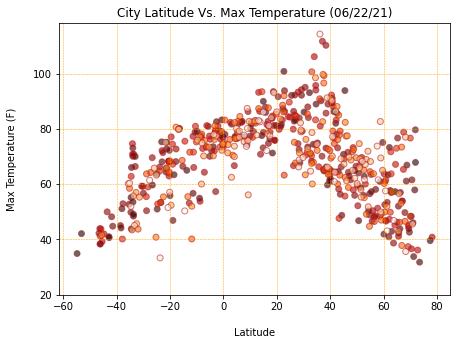

In [12]:
# Latitude vs. Temperature Plot
# Calling function
gen_plot(plot_lat,plot_max_temp,"Max_Temp")

#### What the above code and plot are analyzing:
    * Cities closer to the 30 N line of Lat are warmer. Farther away from 30 N line - cooler the 
      weather. 
    * With cooler temperatures in Southeren Hemisphere and warmer temperatures in Northren Hemisphere 
      it is evident that it is winter and summer in said hemispheres, respectively. Why are there 
      fewer warmer cities past the latitudes of 75 N and 50 S?
      There are simply fewer cities near the Antarctic and Arctic Cirles.

## Latitude vs. Humidity Plot

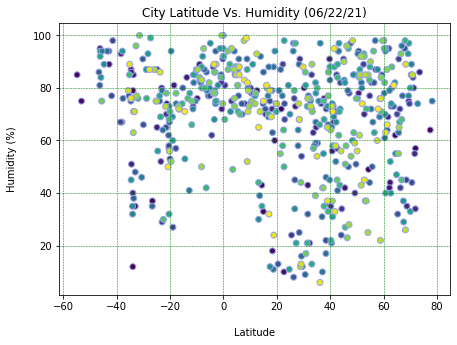

In [13]:
# Latitude vs. Humidity Plot
# Calling function
gen_plot(plot_lat,plot_hum,"Humidity")

#### What the above code and plot are analyzing:
    * Latitude does not have much affect on Humididty. There are propotional number of humid cities
      across all latitudes and majority of the cities are humid on this day with humidity levels 
      between 60% and 100% . Why are there fewer humid cities past the latitudes of 75 N and 50 S?
      There are simply fewer cities near the Antarctic and Arctic Cirles. 

## Latitude vs. Cloudiness Plot

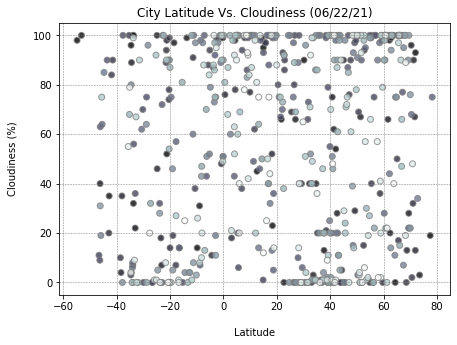

In [14]:
# Latitude vs. Cloudiness Plot
# Calling function
gen_plot(plot_lat,plot_cloud,"Cloudiness")

#### What the above code and plot are analyzing:
    * Latitude does not have much affect on Cloudiness. There are propotional number of cities 
      with varied percentage of cloud cover across all latitudes. A lot of cities across the globe 
      have 0% clouds today and there is also a good percentage of cloudy cities with cloud cover 
      between 80% to 100%. Why are there fewer cloudy cities past the latitudes of 75 N and 50 S?
      There are simply fewer cities near the Antarctic and Arctic Cirles. 

## Latitude vs. Wind Speed Plot

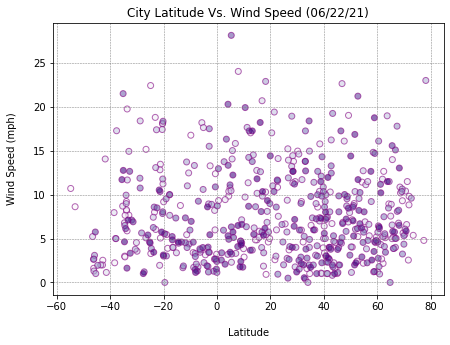

In [15]:
# Latitude vs. Wind Speed Plot
# Calling function
gen_plot(plot_lat,plot_winds,"Wind_Speed")

#### What the above code and plot are analyzing:
    * Latitude does not have much affect on wind speeds either. There are near equal number of cities 
      with varied percentage of wind speeds across all latitudes. The maximum wind speed for most of 
      the cities was between 0 mph and 10 mph. There were some cities with windspeeds between 10 mph 
      and 20 mph. A small percentage of cities across all latitudeswere present with wind speeds 
      more than 20 mph. Why are there fewer windy cities past the latitudes of 60 N and 50 S?
      There are simply fewer cities near the Antarctic and Arctic Cirles. 

## Linear Regression

In [16]:
NH_city_data = clean_city_data.loc[clean_city_data["Lat"]>=0]
SH_city_data = clean_city_data.loc[clean_city_data["Lat"]<0]

In [17]:
NH_plot_colors   = np.arange(len(NH_city_data))
NH_plot_lat      = NH_city_data["Lat"]
NH_plot_max_temp = NH_city_data["Max Temp"]
NH_plot_hum      = NH_city_data["Humidity"]
NH_plot_cloud    = NH_city_data["Cloudiness"]
NH_plot_winds    = NH_city_data["Wind Speed"]

SH_plot_colors   = np.arange(len(SH_city_data))
SH_plot_lat      = SH_city_data["Lat"]
SH_plot_max_temp = SH_city_data["Max Temp"]
SH_plot_hum      = SH_city_data["Humidity"]
SH_plot_cloud    = SH_city_data["Cloudiness"]
SH_plot_winds    = SH_city_data["Wind Speed"]

In [18]:

# Function to take Hemisphere, x and y axes and Calculate linear regression model 
# Generate a plot, display it and save it 

def gen_plot_LR(hem,x,y,yaxis):
    x_values = x
    y_values = y
    ylabel_str = ""
    title_str = ""
    title_str_hem = ""

    if (yaxis=="Max_Temp"):
        ylabel_str = "Max Temperature (F)"
        title_str  = "Max Temp"
    elif (yaxis=="Humidity"):
        ylabel_str = "Humidity (%)"
        title_str  = ylabel_str
    elif (yaxis=="Cloudiness"):
        ylabel_str = "Cloudiness (%)"
        title_str  = ylabel_str  
    elif (yaxis=="Wind_Speed"):
        ylabel_str = "Wind Speed (mph)"
        title_str  = ylabel_str       

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.figure(figsize=(7,5))

    if (hem == "NH"):

        clr_grd     = 'green'
        linsty_grd  = '--'
        linwdth_grd = 0.5

        if (yaxis=="Max_Temp"):
            linx = 45
            liny = 25
        elif (yaxis=="Humidity"):
            linx = 45
            liny = 15
        elif (yaxis=="Cloudiness"):
            linx = 40
            liny = 30  
        elif (yaxis=="Wind_Speed"):
            linx = 45
            liny = 25

        title_str_hem = "Northern Hemisphere"
        plt.scatter(x_values, y_values, c=NH_plot_colors, cmap='ocean_r',  alpha=0.8,edgecolors="#7e85ec")
        if (yaxis=="Max_Temp"):
            plt.ylim(20,y_values.max()+4)
        plt.plot(x_values,regress_values,"r-", color="black", linestyle = '-.', linewidth=0.75)
        plt.annotate(line_eq,(linx,liny),fontsize=15, color="#0b1902")

    elif (hem == "SH"):

        clr_grd     = 'orange'
        linsty_grd  = '--'
        linwdth_grd = 0.5

        if (yaxis=="Max_Temp"):
            linx = -40
            liny = 25
        elif (yaxis=="Humidity"):
            linx = -40
            liny = 20
        elif (yaxis=="Cloudiness"):
            linx = -40
            liny = 20  
        elif (yaxis=="Wind_Speed"):
            linx = -40
            liny = 20

        title_str_hem = "Southern Hemisphere"
        plt.scatter(x_values, y_values, c=SH_plot_colors, cmap='YlOrBr', edgecolors="orange")
        if (yaxis=="Max_Temp"):
            plt.ylim(20,y_values.max()+4)

        plt.plot(x_values,regress_values,"r-", color="green", linestyle = '-.', linewidth=0.75)
        plt.annotate(line_eq,(linx,liny),fontsize=15, color="#913d09")

    plt.xlabel("Latitude", labelpad=16)
    plt.ylabel(ylabel_str, labelpad=16)
    plt.title (f"{title_str_hem} - {title_str} Vs. Latitude Linear Regression ({plot_date})")
        
    plt.grid(color = clr_grd, linestyle = linsty_grd, linewidth = linwdth_grd)

    # Print out the r-squared value along with the plot.
    print(f"The r-value is: {round(rvalue,2)}")
    print(f"The equation of regression line is: {line_eq}")

    outfile = "output_plots/"+hem+"_city_lat_vs_"+yaxis+"LR"
    plot_image_file_jpeg = outfile+".jpeg"
    plot_image_file_png  = outfile+".png"
    
    plt.savefig(plot_image_file_jpeg)
    plt.savefig(plot_image_file_png)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.65
The equation of regression line is: y = -0.49x + 89.53


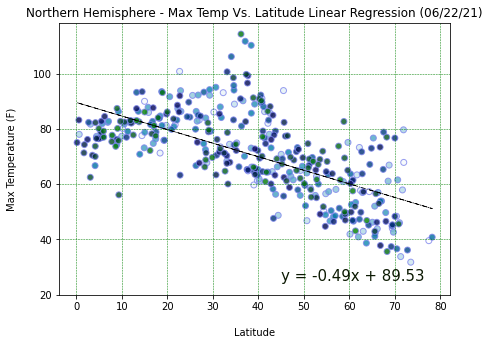

In [19]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# Call function 
gen_plot_LR("NH",NH_plot_lat,NH_plot_max_temp,"Max_Temp")


#### What the above code and plot are analyzing :
    * Cities closer to the 30 N line of Lat are warmer. Farther away from 30 N line - cooler the 
      weather. 
    * This is evident with an r value of -0.65 which shows that the Latitude and 
      Temperature have a STRONG correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.75
The equation of regression line is: y = 0.7x + 78.12


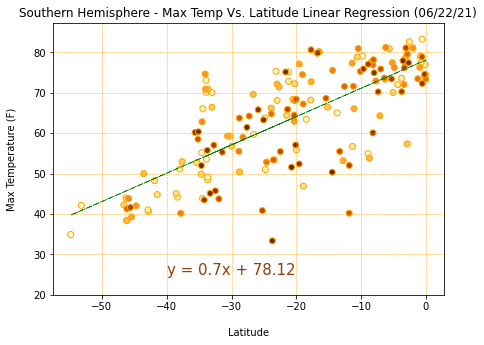

In [20]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
# Call function 
gen_plot_LR("SH",SH_plot_lat,SH_plot_max_temp,"Max_Temp")


#### What the above code and plot are analyzing Southern Hemisphere Cities:
    * Cities closer to the 0 line of Lat are warmer. Farther away from 0  line - cooler the 
      weather. 
    * This is evident with an r value of 0.75 which shows that the Latitude and 
      Temperature have a STRONG correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.04
The equation of regression line is: y = -0.04x + 68.52


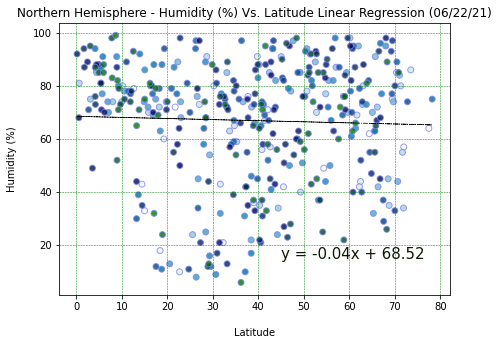

In [21]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Call function 
gen_plot_LR("NH",NH_plot_lat,NH_plot_hum,"Humidity")


#### What the above code and plot are analyzing about Northern Hemisphere Cities:
    * Latitude does not have much affect on Humididty. There are propotional number of humid cities
      across all latitudes and majority of the cities are humid on this day with humidity levels 
      between 70% and 100% . 
    * This is evident with the r value of -0.04 which shows that the Latitude and Humididty have 
      a VERY WEAK correlation. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1
The equation of regression line is: y = 0.13x + 76.86


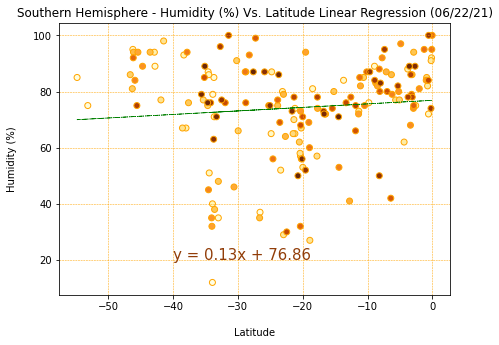

In [22]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# Call function 
gen_plot_LR("SH",SH_plot_lat,SH_plot_hum,"Humidity")


#### What the above code and plot are analyzing Southern Hemisphere Cities:
    * Latitude does not have much affect on Humididty. There are propotional number of humid cities
      across all latitudes and majority of the cities are humid on this day with humidity levels 
      between 70% and 100% . 
    * This is evident with the r value of 0.1 which shows that the Latitude and Humididty have a 
      VERY WEAK correlation. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.1
The equation of regression line is: y = -0.19x + 63.55


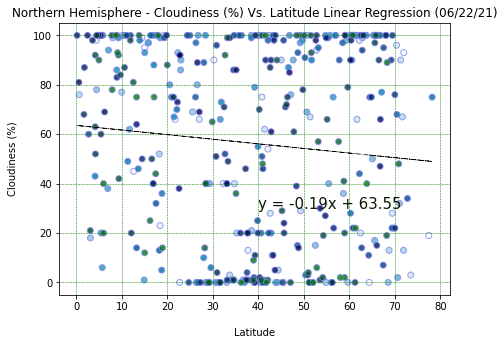

In [23]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Call function 
gen_plot_LR("NH",NH_plot_lat,NH_plot_cloud,"Cloudiness")


 #### What the above code and plot are analyzing Northern Hemisphere Cities:
    * Latitude does not have much affect on Cloudiness. There are propotional number of cities 
      with varied percentage of cloud cover across all latitudes. A lot of cities across the globe 
      have 0% clouds today and there is also a good percentage of cloudy cities with cloud cover 
      between 80% to 100%. 
    * This is evident with an r value of -0.1 which shows that the Latitude and Cloudiness have a 
      VERY WEAK correlation. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17
The equation of regression line is: y = 0.46x + 59.75


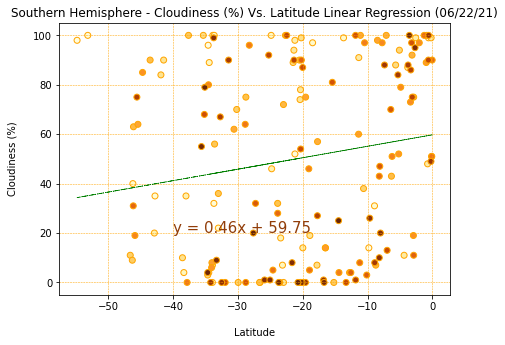

In [24]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Call function 
gen_plot_LR("SH",SH_plot_lat,SH_plot_cloud,"Cloudiness")


#### What the above code and plot are analyzing Southern Hemisphere Cities:
    * Latitude does not have much affect on Cloudiness. There are propotional number of cities 
      with varied percentage of cloud cover across all latitudes. A lot of cities across the globe 
      have 0% clouds today and there is also a good percentage of cloudy cities with cloud cover 
      between 80% to 100%. 
    * This is evident with an r value of 0.17 which shows that the Latitude and Cloudiness have a 
      VERY WEAK correlation. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1
The equation of regression line is: y = -0.03x + 8.7


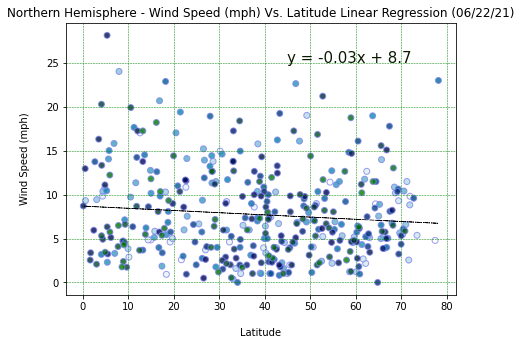

In [25]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Call function 
gen_plot_LR("NH",NH_plot_lat,NH_plot_winds,"Wind_Speed")


#### What the above code and plot are analyzing about Northern Hemisphere Cities:
    * Latitude does not have much affect on wind speeds either. There are near equal number of cities 
      with varied percentage of wind speeds across all latitudes. The maximum wind speed for most of 
      the cities is between 0 mph and 10 mph. There were some cities with windspeeds between 10 mph 
      and 20 mph. A small percentage of cities across all latitudes were present with wind speeds 
      more than 20 mph. 
    * This is evident with an r value of -0.1 which shows that the Latitude and Wind Speed have a 
      VERY WEAK correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.06
The equation of regression line is: y = -0.02x + 6.63


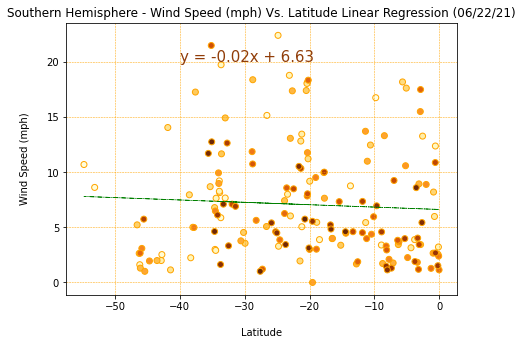

In [26]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Call function 
gen_plot_LR("SH",SH_plot_lat,SH_plot_winds,"Wind_Speed")


#### What the above code and plot are analyzing about Southern Hemisphere Cities:
    * Latitude does not have much affect on wind speeds either. There are near equal number of cities 
      with varied percentage of wind speeds across all latitudes. The maximum wind speed for most of 
      the cities is between 0 mph and 10 mph. There were some cities with windspeeds between 10 mph 
      and 15 mph. A small percentage of cities across all latitudes were present with wind speeds 
      more than 15 mph. 
    * This is evident with an r value of -0.06 which shows that the Latitude and Wind Speed have 
      a VERY WEAK correlation.